# Text Analysis
## 
### Cristobal Donoso
#### Mayo 2018

In [1]:
import numpy as np
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize 
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer

In [2]:
'''If you need download the stopwords please uncomment it'''
#nltk.download('stopwords')
#nltk.download('punkt')

'If you need download the stopwords please uncomment it'

### Reading the text file

In [3]:
#Leer un archivo de texto
with open('advs.txt', 'r') as a:
    texto = a.read()

### Extracting Tokens 

In [4]:
tokens = word_tokenize(texto)
tokens = [token.lower() for token in tokens]

### Homework 1

**a)** Which is the token that has more vowels?

In [5]:
unique_tokens = set(tokens)
vowels_list = "aeiouAEIOU"
max_size = 0
for token in unique_tokens:
    vowels = 0
    for char in token:
        if char in vowels_list:
            vowels+=1
    if vowels > max_size:
        max_size = vowels
        more_vowels_token = token
print('token: ', more_vowels_token, '(',max_size,'vowels)')

token:  conventionalities ( 8 vowels)


**b)** Which is the token that has more consonants?

In [6]:
max_size = 0
for token in unique_tokens:
    consonants = 0
    for char in token:
        if char not in vowels_list:
            consonants+=1
    if consonants > max_size:
        max_size = consonants
        more_consonants_token = token
print('token: ', more_consonants_token, '(',max_size,'consonants)')

token:  two-hundred-year-old ( 14 consonants)


**c)** What is the longest token?

In [7]:
max_size = 0
for token in unique_tokens:
    size = len(token)
    if size > max_size:
        max_size = size
        longest_token = token
print('token: ', longest_token, '(',max_size,'chars)')

token:  two-hundred-year-old ( 20 chars)


### Sorting data in Pandas dataframe  

In [8]:
from operator import itemgetter
counter = Counter(tokens)
items = counter.items()
counter_sorted = sorted(items, key=itemgetter(1), reverse=True)
column = ['Token', 'Frequency']
data_frame = pd.DataFrame.from_dict(counter_sorted)
data_frame.columns = column

**d)** What are the 10 most frequent tokens?

In [9]:
most_frequent = data_frame.head(10)
most_frequent

,Token,Frequency
0,",",7626
1,.,5734
2,the,5615
3,and,2994
4,i,2987
5,``,2764
6,to,2685
7,of,2659
8,a,2638
9,'',2330


**e)** What are the 10 less frequent tokens?

In [10]:
less_frequent = data_frame[data_frame.Frequency == 1].head(10)
less_frequent

,Token,Frequency
4448,conan,1
4449,doyle,1
4450,1,1
4451,3,1
4452,eclipses,1
4453,predominates,1
4454,sex,1
4455,emotions,1
4456,abhorrent,1
4457,balanced,1


**f)** How many tokens correspond to numbers only?

In [11]:
numbers = []
for token in data_frame['Token']:
    continue_ = True
    for char in token:
        ascii_ = ord(char)
        if ascii_ > 47 and ascii_ < 58:
            continue
        else:
            continue_ = False
            break
    if continue_:
        numbers.append(token)

print('Number tokens: ',len(numbers))

Number tokens:  29


**g)** How many tokens contain only letters and numbers?

In [13]:
leters_numbers = []
for token in data_frame['Token']:
    continue_ = True
    for char in token:
        ascii_ = ord(char)
        if (ascii_ > 47 and ascii_ < 58) or (ascii_ > 96 and ascii_ < 123):
            continue
        else:
            continue_ = False
            break
    if continue_:
        leters_numbers.append(token)

print('Number tokens: ',len(leters_numbers))

Number tokens:  7654


**h)** What are the 10 most frequent stopwords?

In [14]:
text_words = texto.split(' ') #remove spaces grouping by words
stop_words = set(stopwords.words('english'))
stop_words_text = [word for word in text_words if word in stop_words]

In [15]:
counter_stopwords = Counter(stop_words_text)
counter_sorted = sorted(counter_stopwords.items(), key=itemgetter(1), reverse=True)
stopwords_text = pd.DataFrame(counter_sorted)
column = ['Stopword', 'Frequency']
stopwords_text.columns = column
stopwords_text.head()

,Stopword,Frequency
0,the,4721
1,and,2505
2,to,2439
3,of,2424
4,a,2279


**i)** Zipf's law

In [16]:
counter_text = Counter(text_words)
counter_sorted = sorted(counter_text.items(), key=itemgetter(1), reverse=True)
stopwords_text = pd.DataFrame(counter_sorted)
column = ['word', 'Frequency']
stopwords_text.columns = column
stopwords_text = stopwords_text[stopwords_text.word != '']
#stopwords_text.head(10)

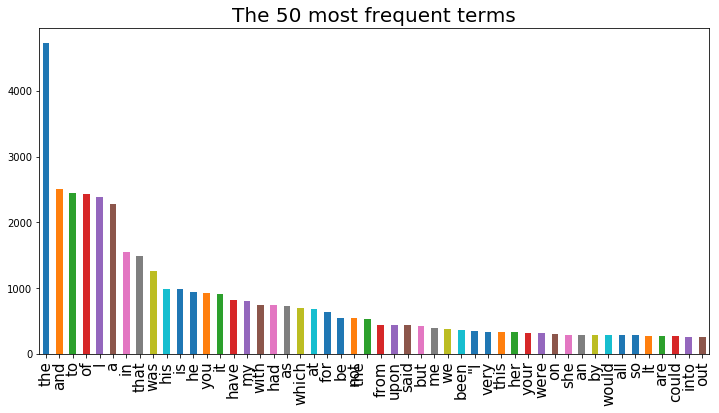

In [66]:
stopwords_text_plot = stopwords_text.iloc[0:50]
xas = stopwords_text_plot.word.tolist()
ax = stopwords_text_plot['Frequency'].plot(kind='bar', 
                                           title = 'The 50 most frequent terms',
                                           figsize=(12,6), 
                                           xticks=stopwords_text_plot.index,
                                           rot=90)
ax.title.set_fontsize(20)
ap = ax.set_xticklabels(labels=stopwords_text_plot.word, fontsize=15)


**j)** What is the percentage variation of the lexical diversity of the corpus after applying stemming ?.

In [61]:
stemmer = SnowballStemmer('english')
unique_words = set(text_words)
palabras_stemm = [stemmer.stem(word) for word in unique_words]
palabras_stemm_unicas = set(palabras_min_stemm)  

print(100*(len(palabras_stemm_unicas)-len(unique_words))/len(unique_words))

-16.323343943306707


**k)** What is the percentage variation of the lexical diversity of the corpus after removing stopwords?

In [62]:
text_wo_stopwords = [word for word in text_words if word not in stop_words]
unique_words = set(text_wo_stopwords)
palabras_stemm = [stemmer.stem(word) for word in unique_words]
palabras_stemm_unicas = set(palabras_min_stemm)  

print(100*(len(palabras_stemm_unicas)-len(unique_words))/len(unique_words))

-15.63427187405389


In [68]:
stemmer = SnowballStemmer('english')
unique_words = set(text_words)
text_w_stopwords = [word for word in text_words if word in stop_words]
unique_words = set(text_w_stopwords)
for word in unique_words:
    st = stemmer.stem(word)
    print(st, ' - ', word)

of  -  of
won  -  won
will  -  will
most  -  most
other  -  other
has  -  has
if  -  if
same  -  same
itself  -  itself
been  -  been
and  -  and
ourselv  -  ourselves
doe  -  does
our  -  our
had  -  had
some  -  some
now  -  now
themselv  -  themselves
him  -  him
did  -  did
didn't  -  didn't
is  -  is
do  -  do
was  -  was
onli  -  only
my  -  my
as  -  as
should  -  should
those  -  those
your  -  yours
were  -  were
into  -  into
your  -  your
from  -  from
off  -  off
by  -  by
the  -  the
how  -  how
there  -  there
for  -  for
are  -  are
what  -  what
do  -  doing
just  -  just
it  -  its
veri  -  very
have  -  have
you'v  -  you've
dure  -  during
up  -  up
wasn't  -  wasn't
have  -  having
these  -  these
here  -  here
then  -  then
further  -  further
their  -  theirs
it  -  it
to  -  to
which  -  which
whi  -  why
each  -  each
nor  -  nor
am  -  am
with  -  with
on  -  on
down  -  down
them  -  them
can  -  can
won't  -  won't
own  -  own
over  -  over
they  -  they
whil